### Exploring Port Elizabeth Property Market

#### Highlights:
- **Diverse Property Types**: Explore a wide range of property types, including houses, apartments, compounds, and townhouses.
- **Varied Locations**: Properties are located across 74 different areas within Port Elizabeth, providing options to suit various preferences.
- **Price Range**: Prices range from affordable options starting at R 350,000 to luxurious properties priced at R 3,695,000 and above.
- **Experienced Agents**: Benefit from the expertise of 23 different agents who are actively involved in listing properties in the area.
- **Market Dynamics**: Gain insights into market dynamics, including property availability, price trends, and agent activity.

### Understanding the Dataset

#### Overview:
- **Size**: The dataset comprises 292 entries and 5 columns.
- **Data Types**: Most columns are stored as strings, with the exception of the price column.
- **Unique Values**: There are a variety of unique property types, locations, prices, and agent names.
- **Missing Values**: The `bold-font` column contains missing values, possibly indicating additional information about the properties.

#### Objective:
**The objective is to create an interactive dashboard using Dash to provide insights into the Port Elizabeth property market using JUST PROPERTY PE´s listings . This dashboard aims to facilitate understanding for agents, developers, and regular buyers by offering visualizations, property details, and data insights.**

In [3]:
import pandas as pd

# Load the data
data = pd.read_excel("/Users/blessingsekeramavi/Downloads/JUST PROPERTY ANALYSIS.xlsx")


 


### DISPLAYING OUR DATASET

In [4]:
# Display the first few rows of the dataset
print(data.head())

# Check the data types and missing values
print(data.info())

# Descriptive statistics
print(data.describe())


         property-name                                location        price  \
0      4 bedroom house                  Walmer, Port Elizabeth  R 3 695 000   
1  1 bedroom apartment  Port Elizabeth Central, Port Elizabeth    R 350 000   
2  1 bedroom apartment                Humewood, Port Elizabeth    R 750 000   
3   3 bedroom compound                  Walmer, Port Elizabeth    R 850 000   
4  2 bedroom townhouse                  Kabega, Port Elizabeth    R 780 000   

      agent-name bold-font  
0  Tracey Hutton       NaN  
1   Mikyle Brass       NaN  
2  Rita Claassen       NaN  
3  Rita Claassen       NaN  
4    Ryno Fourie       NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property-name  292 non-null    object
 1   location       292 non-null    object
 2   price          292 non-null    object
 3   agent-name     292 non-null

### Visualization

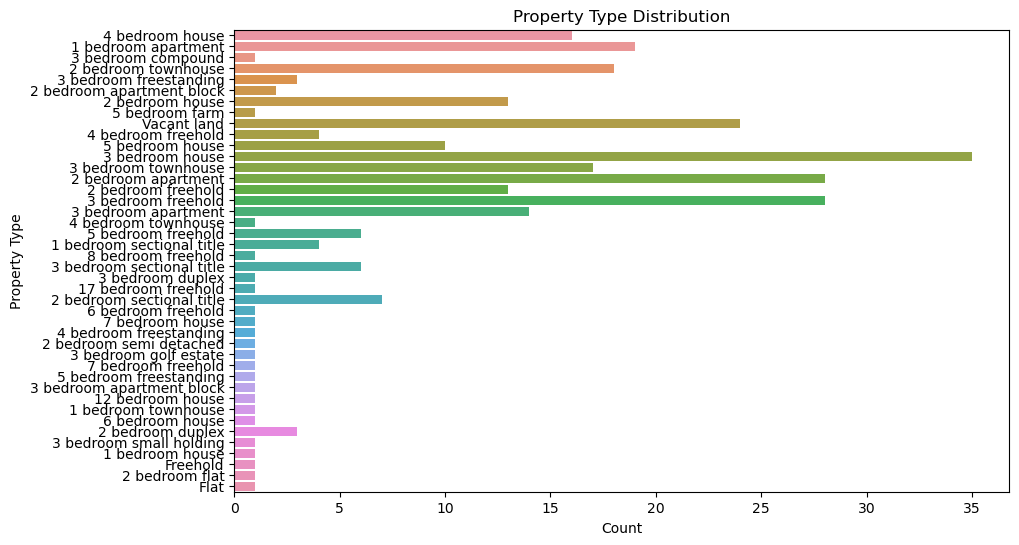

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


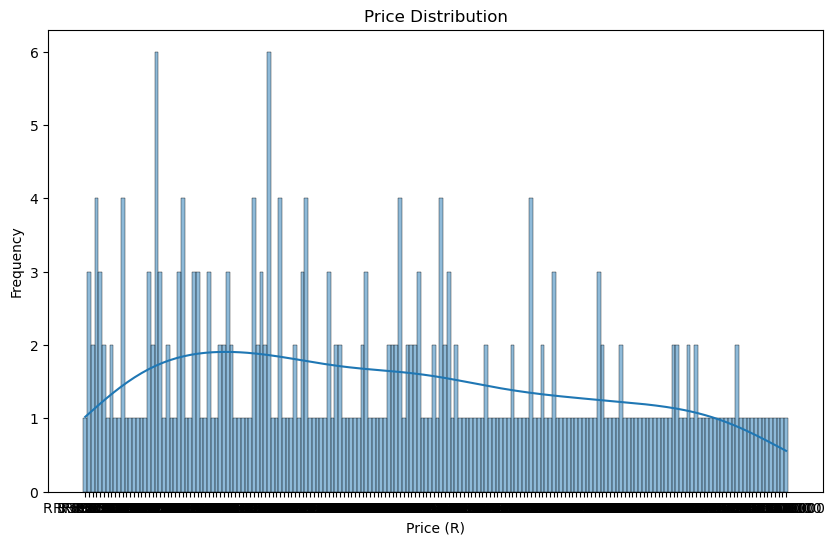

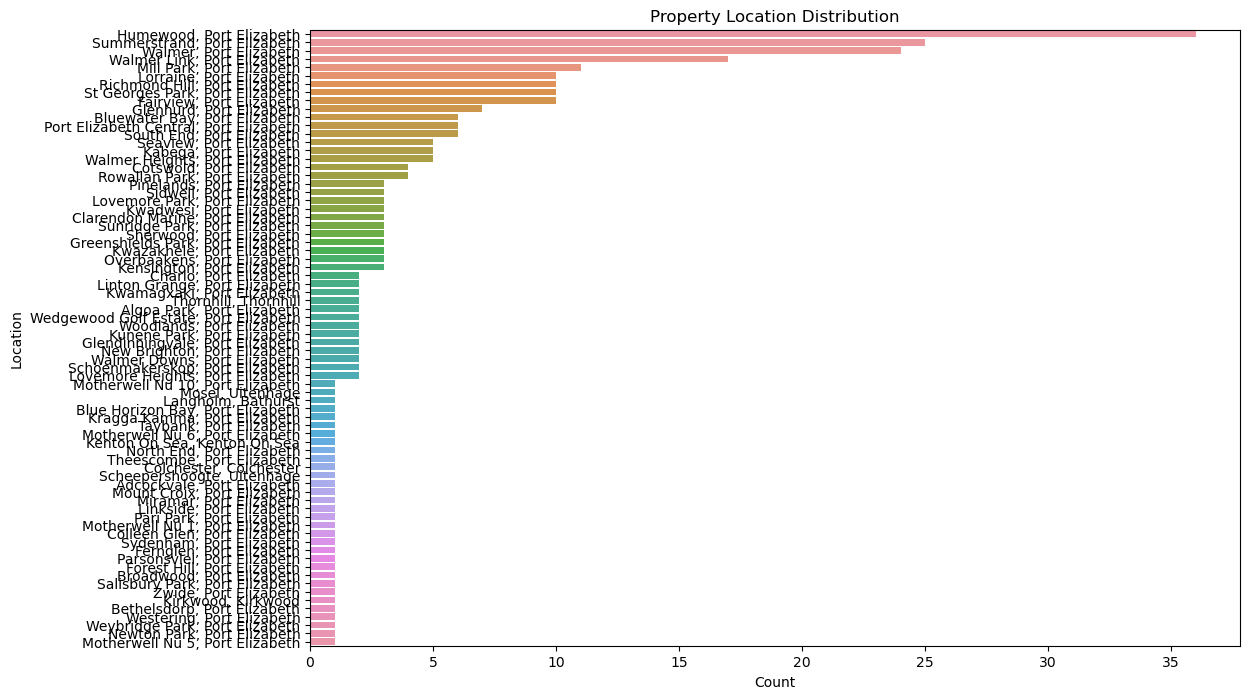

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Property type distribution
plt.figure(figsize=(10, 6))
sns.countplot(y="property-name", data=data)
plt.title("Property Type Distribution")
plt.xlabel("Count")
plt.ylabel("Property Type")
plt.show()

# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="price", bins=20, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (R)")
plt.ylabel("Frequency")
plt.show()

# Location distribution
plt.figure(figsize=(12, 8))
sns.countplot(y="location", data=data, order=data['location'].value_counts().index)
plt.title("Property Location Distribution")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()


In [6]:
# Check unique values in 'agent-name' column
print("Unique Agents:", data['agent-name'].unique())

# Check if there are any missing values in the 'price' column
print("Missing Prices:", data['price'].isnull().sum())

# Check if there are any missing values in the 'agent-name' column
print("Missing Agent Names:", data['agent-name'].isnull().sum())


Unique Agents: ['Tracey Hutton' 'Mikyle Brass' 'Rita Claassen' 'Ryno Fourie'
 'Noziqhamo Moss' 'Simone Conradie' 'Suzette Moco' 'Sivenathi Hobongwana'
 'Gavin Ludick' 'Meghan Lindique' 'Lea-Ann Webster' 'Kath Robinson'
 'Lucy Baatjies' 'Hayley Egling' 'Gavin O Leary'
 'Beata Jansen van Rensburg' 'Thandi Ndzombane' 'Nikki Moulton'
 'Belinda Serfontein' 'Christopher Xotongo' 'Anton Botha' 'Odwa Zimba'
 'Lwahluma Mtsulwana']
Missing Prices: 0
Missing Agent Names: 0


### TOP AGENTS BY NUMBER OF PROPERTIES 

In [7]:
# Top agents by number of properties sold
top_agents_count = data['agent-name'].value_counts().nlargest(10)
print("Top Agents by Number of Properties Sold:")
print(top_agents_count)




Top Agents by Number of Properties Sold:
agent-name
Rita Claassen           57
Noziqhamo Moss          39
Tracey Hutton           33
Thandi Ndzombane        24
Nikki Moulton           18
Kath Robinson           16
Suzette Moco            15
Gavin O Leary           14
Sivenathi Hobongwana    11
Meghan Lindique          9
Name: count, dtype: int64


### Property Price Analysis

In [8]:
# Clean 'price' column and convert to numeric
data['price'] = data['price'].str.replace('R', '').str.replace(',', '').str.replace(' ', '')

# Replace 'POA' with NaN
data['price'] = data['price'].replace('POA', float('nan'))

# Convert to float
data['price'] = data['price'].astype(float)

# Average price by location
avg_price_location = data.groupby('location')['price'].mean().sort_values(ascending=False)
print("\nAverage Price by Location:")
print(avg_price_location)




Average Price by Location:
location
Kragga Kamma, Port Elizabeth       1.090000e+07
Schoenmakerskop, Port Elizabeth    7.525000e+06
Colleen Glen, Port Elizabeth       6.900000e+06
Theescombe, Port Elizabeth         5.400000e+06
Kirkwood, Kirkwood                 4.500000e+06
                                       ...     
Langholm, Bathurst                 3.500000e+05
Sidwell, Port Elizabeth            3.433333e+05
Kwazakhele, Port Elizabeth         2.683333e+05
New Brighton, Port Elizabeth       2.540000e+05
Colchester, Colchester             2.300000e+05
Name: price, Length: 74, dtype: float64


### This output represents the average price of properties in various locations.
Each row corresponds to a specific location, and the value in the row indicates the average price of properties in that location.

For example:

The average price of properties in "Kragga Kamma, Port Elizabeth" is 10,900,000 (10.9 million) Rand.
The average price of properties in "Schoenmakerskop, Port Elizabeth" is 7,525,000 (7.525 million) Rand.
The average price of properties in "Colleen Glen, Port Elizabeth" is 6,900,000 (6.9 million) Rand.
And so on for each location listed.
This information can be helpful for understanding the general price range of properties in different areas, which can be useful for various purposes such as real estate investment, market analysis, or property valuation.

### Identify Investment Opportunities

In [10]:
# Identify areas with high demand but low supply
high_demand_low_supply = data['location'].value_counts().tail(10)
print("\nAreas with High Demand but Low Supply:")
print(high_demand_low_supply)

# Emerging trends in property types or locations
# You can use visualizations to showcase trends over time or compare different segments.



Areas with High Demand but Low Supply:
location
Forest Hill, Port Elizabeth        1
Broadwood, Port Elizabeth          1
Salisbury Park, Port Elizabeth     1
Zwide, Port Elizabeth              1
Kirkwood, Kirkwood                 1
Bethelsdorp, Port Elizabeth        1
Westering, Port Elizabeth          1
Weybridge Park, Port Elizabeth     1
Newton Park, Port Elizabeth        1
Motherwell Nu 5, Port Elizabeth    1
Name: count, dtype: int64


In [ ]:
data. head()

### TOP AGENT PER LOCATION 

In [11]:
# Group the data by location and agent-name, then sum the sales value for each agent in each location
grouped_data = data.groupby(['location', 'agent-name'])['price'].sum().reset_index()

# Find the index of the maximum sales value for each location
max_sales_index = grouped_data.groupby('location')['price'].idxmax()

# Use the index to extract the rows with the maximum sales value for each location
top_agents_per_location = grouped_data.loc[max_sales_index]

# Display the result
print(top_agents_per_location)


                                  location            agent-name      price
0               Adcockvale, Port Elizabeth         Nikki Moulton  1700000.0
2               Algoa Park, Port Elizabeth        Noziqhamo Moss   658000.0
3              Bethelsdorp, Port Elizabeth  Sivenathi Hobongwana   580000.0
4         Blue Horizon Bay, Port Elizabeth       Meghan Lindique  2900000.0
7            Bluewater Bay, Port Elizabeth          Suzette Moco  5650000.0
..                                     ...                   ...        ...
163  Wedgewood Golf Estate, Port Elizabeth         Tracey Hutton  4995000.0
164              Westering, Port Elizabeth         Kath Robinson  1395000.0
165         Weybridge Park, Port Elizabeth         Nikki Moulton  2500000.0
166              Woodlands, Port Elizabeth         Rita Claassen  2399000.0
168                  Zwide, Port Elizabeth        Noziqhamo Moss   695000.0

[74 rows x 3 columns]


### COMMON BEDROOMS PER LOCATION

In [12]:
common_bedrooms_per_location = data.groupby('location')['property-name'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)


In [13]:
print(common_bedrooms_per_location)


location
Adcockvale, Port Elizabeth               3 bedroom freestanding
Algoa Park, Port Elizabeth                  2 bedroom apartment
Bethelsdorp, Port Elizabeth                  3 bedroom freehold
Blue Horizon Bay, Port Elizabeth                5 bedroom house
Bluewater Bay, Port Elizabeth                3 bedroom freehold
                                                  ...          
Wedgewood Golf Estate, Port Elizabeth     3 bedroom golf estate
Westering, Port Elizabeth                   3 bedroom townhouse
Weybridge Park, Port Elizabeth               3 bedroom freehold
Woodlands, Port Elizabeth                    3 bedroom freehold
Zwide, Port Elizabeth                        3 bedroom freehold
Name: property-name, Length: 74, dtype: object


In [14]:
!pip install dash



In [15]:
data. head ()


,property-name,location,price,agent-name,bold-font
0,4 bedroom house,"Walmer, Port Elizabeth",3695000.0,Tracey Hutton,NaN
1,1 bedroom apartment,"Port Elizabeth Central, Port Elizabeth",350000.0,Mikyle Brass,NaN
2,1 bedroom apartment,"Humewood, Port Elizabeth",750000.0,Rita Claassen,NaN
3,3 bedroom compound,"Walmer, Port Elizabeth",850000.0,Rita Claassen,NaN
4,2 bedroom townhouse,"Kabega, Port Elizabeth",780000.0,Ryno Fourie,NaN


### PROPERTY DASHBOARD 

In [16]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd

# Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    html.H1("Property Analysis Dashboard"),

    html.Div([
        html.Label("Select Agent Name:"),
        dcc.Dropdown(
            id='agent-dropdown',
            options=[{'label': agent, 'value': agent} for agent in data['agent-name'].unique()],
            value=data['agent-name'].unique()[0]
        ),
    ]),

    html.Div(id='property-table'),

    html.Div([
        html.Label("Select Property Name:"),
        dcc.Dropdown(
            id='property-dropdown',
            options=[{'label': prop, 'value': prop} for prop in data['property-name'].unique()],
            value=data['property-name'].unique()[0]
        ),
    ]),

    html.Div(id='property-info')
])

# Define callback to update property table
@app.callback(
    Output('property-table', 'children'),
    [Input('agent-dropdown', 'value')]
)
def update_property_table(selected_agent):
    # Filter the data
    agent_data = data[data['agent-name'] == selected_agent]

    # Create property table
    property_table = html.Table([
        html.Thead(
            html.Tr([
                html.Th("Property Name"),
                html.Th("Location"),
                html.Th("Price (R)")
            ])
        ),
        html.Tbody([
            html.Tr([
                html.Td(prop_name),
                html.Td(loc),
                html.Td(f"{float(price):,.0f}")  # Convert price to float before formatting
            ])
            for prop_name, loc, price in zip(agent_data['property-name'], agent_data['location'], agent_data['price'])
        ])
    ])

    return property_table

# Define callback to update property info
@app.callback(
    Output('property-info', 'children'),
    [Input('property-dropdown', 'value')]
)
def update_property_info(selected_property):
    # Filter the data
    property_data = data[data['property-name'] == selected_property]

    # Create property info table
    property_info_table = html.Table([
        html.Thead(
            html.Tr([
                html.Th("Location"),
                html.Th("Agent Name"),
                html.Th("Price (R)")
            ])
        ),
        html.Tbody([
            html.Tr([
                html.Td(loc),
                html.Td(agent),
                html.Td(f"{float(price):,.0f}")  # Convert price to float before formatting
            ])
            for loc, agent, price in zip(property_data['location'], property_data['agent-name'], property_data['price'])
        ])
    ])

    return property_info_table

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)




**For Agents:**
Imagine you're using a special website that helps you see all the properties you're managing in one place. When you visit the website, you'll find a dropdown menu where you can choose your name. After you select your name, the website will show you a list of properties you're in charge of, along with where they are located and how much they cost. This makes it easy for you to keep track of all the properties you're handling without having to search through lots of documents or emails.

**For Property Developers (Non-technical):**
Think of it as building a digital tool for real estate agents. We're using a special tool called Dash that helps us create websites where agents can see information about properties. In this tool, there are two main parts:

1. **Agent Selector**: This is like a dropdown menu where agents can choose their name. It's a way for them to tell the website which properties they want to see.

2. **Property Information Display**: Once an agent picks their name, the website shows them a table with details of the properties they're handling. It includes things like the name of the property, where it is located, and how much it costs. The website automatically updates this table whenever an agent selects their name.

Overall, it's a handy tool that agents can use to quickly see all the properties they're managing, and it's built using a tool that makes it easy for developers to create websites without needing to write a lot of complicated code.